In [50]:
import numpy as np
import matplotlib.pyplot as plt

In [68]:
def gradient_descent(X, y, learning_rate=0.000001, iterations=20):
    m, b = 0.0, 0.0
    n = len(y)

    for i in range(iterations):
        y_pred = m * X + b
        cost = (1/n) * np.sum((y - y_pred)**2)

        dm = (-2/n) * np.sum(X * (y - y_pred))
        db = (-2/n) * np.sum(y - y_pred)

        m -= learning_rate * dm
        b -= learning_rate * db

        print(f'Epoch {i+1} | y = {m:.4f}x + {b:.4f} | MSE: {cost:.4f}')

In [82]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent_plot(X, y, learning_rate=0.000001, iterations=10):
    m, b = 0.0, 0.0
    n = len(y)
    m_history = []
    b_history = []
    cost_history = []

    # Set up the subplots
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))

    for i in range(iterations):
        y_pred = m * X + b
        cost = (1/n) * np.sum((y - y_pred)**2)

        dm = (-2/n) * np.sum(X * (y - y_pred))
        db = (-2/n) * np.sum(y - y_pred)

        m -= learning_rate * dm
        b -= learning_rate * db

        m_history.append(m)
        b_history.append(b)
        cost_history.append(cost)

        # Plotting on the left subplot (scatter + line)
        ax[0].scatter(X, y, color='blue')  # Scatter plot of the actual data
        ax[0].plot(X, y_pred, label=f'Iteration {i+1}')  # Linear line with iteration label
        ax[0].set_xlabel('size')
        ax[0].set_ylabel('price')
        ax[0].set_title('Linear Regression Fit Over Iterations')
        ax[0].legend()

        print(f'Epoch {i+1} | y = {m:.4f}x + {b:.4f} | MSE: {cost:.4f}')

    # Plotting on the right subplot (Cost vs Iterations)
    ax[1].plot(range(len(cost_history)), cost_history, color='green')
    ax[1].set_xticks(range(len(cost_history)))
    ax[1].set_xlabel('Iteration')
    ax[1].set_ylabel('Cost (MSE)')
    ax[1].set_title('Error (Cost) vs Iterations')

    plt.tight_layout()
    plt.show()

Epoch 1 | y = 0.6895x + 0.0009 | MSE: 217492.5000
Epoch 2 | y = 0.6234x + 0.0008 | MSE: 2566.0208
Epoch 3 | y = 0.6297x + 0.0008 | MSE: 587.4485
Epoch 4 | y = 0.6291x + 0.0008 | MSE: 569.2342
Epoch 5 | y = 0.6292x + 0.0008 | MSE: 569.0665
Epoch 6 | y = 0.6292x + 0.0008 | MSE: 569.0650
Epoch 7 | y = 0.6292x + 0.0008 | MSE: 569.0649
Epoch 8 | y = 0.6292x + 0.0008 | MSE: 569.0649
Epoch 9 | y = 0.6292x + 0.0008 | MSE: 569.0649
Epoch 10 | y = 0.6292x + 0.0008 | MSE: 569.0649


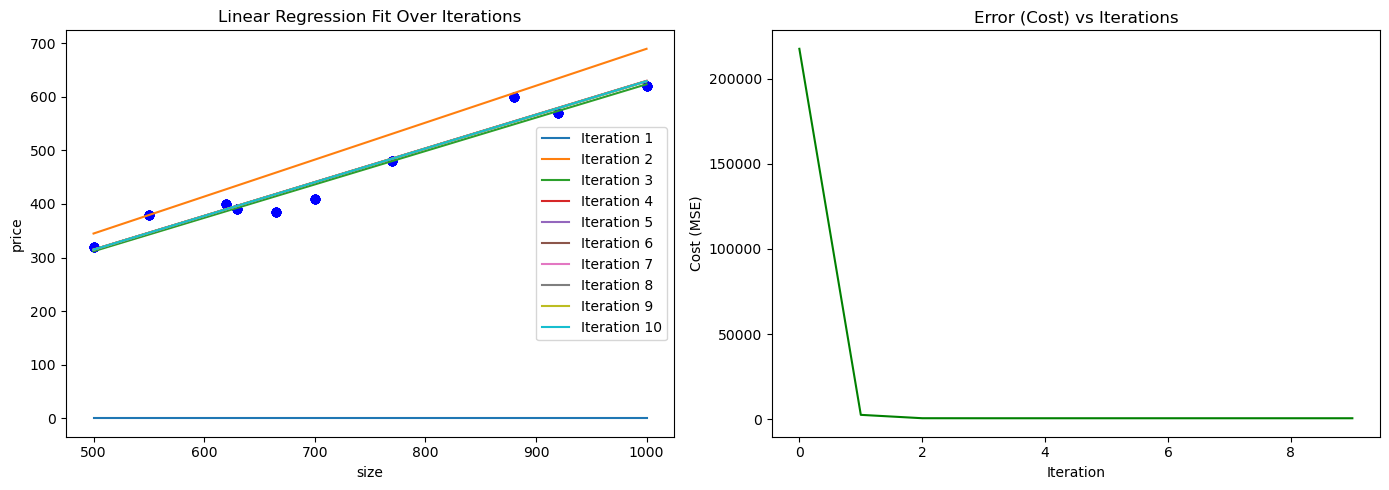

In [83]:
# Generate synthetic data
# X, y = generate_synthetic_data(num_points=100, noise_level=50)
# Example usage with your data
X = np.array([500, 550, 620, 630, 665, 700, 770, 880, 920, 1000])
y = np.array([320, 380, 400, 390, 385, 410, 480, 600, 570, 620])

# Perform gradient descent
gradient_descent_plot(X, y, iterations=10)
# m_history, b_history, cost_history = gradient_descent(X, y, iterations=20)

In [97]:
import numpy as np

def batch_gradient_descent(X, y, learning_rate=0.000001, iterations=20):
    a, b = 0.0, 0.0
    n = len(y)
    cost_history = []

    for i in range(iterations):
        y_pred = m * X + b
        cost = (1/n) * np.sum((y - y_pred)**2)

        derivarive_a = (-2/n) * np.sum(X * (y - y_pred))
        db = (-2/n) * np.sum(y - y_pred)

        m -= learning_rate * dm
        b -= learning_rate * db

        cost_history.append(cost)
        print(f"Iteration {i+1}: MSE = {cost:.4f}, m = {m:.4f}, b = {b:.4f}")

    return m, b, cost_history

In [98]:
def stochastic_gradient_descent(X, y, learning_rate=0.0001, iterations=20):
    m, b = 0.0, 0.0
    n = len(y)
    cost_history = []

    for i in range(iterations):
        idx = np.random.randint(0, n)
        x_i = X[idx]
        y_i = y[idx]

        y_pred_i = m * x_i + b
        cost = (y_i - y_pred_i)**2

        dm = -2 * x_i * (y_i - y_pred_i)
        db = -2 * (y_i - y_pred_i)

        m -= learning_rate * dm
        b -= learning_rate * db

        cost_history.append(cost)
        print(f"Iteration {i+1}: MSE = {cost:.4f}, m = {m:.4f}, b = {b:.4f}")

    return m, b, cost_history

In [99]:
def mini_batch_gradient_descent(X, y, learning_rate=0.0001, iterations=100, batch_size=20):
    m, b = 0.0, 0.0
    n = len(y)
    cost_history = []

    for i in range(iterations):
        indices = np.random.choice(n, batch_size, replace=False)
        X_batch = X[indices]
        y_batch = y[indices]

        y_pred_batch = m * X_batch + b
        cost = (1/batch_size) * np.sum((y_batch - y_pred_batch)**2)

        dm = (-2/batch_size) * np.sum(X_batch * (y_batch - y_pred_batch))
        db = (-2/batch_size) * np.sum(y_batch - y_pred_batch)

        m -= learning_rate * dm
        b -= learning_rate * db

        cost_history.append(cost)
        print(f"Iteration {i+1}: MSE = {cost:.4f}, m = {m:.4f}, b = {b:.4f}")

    return m, b, cost_history

In [100]:
import matplotlib.pyplot as plt

def plot_gradient_descent(X, y, m, b, cost_history, method_name):
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))

    # Plot the data and the regression line
    ax[0].scatter(X, y, color='blue')
    ax[0].plot(X, m * X + b, color='red', label=f'Final Model: y = {m:.4f}x + {b:.4f}')
    ax[0].set_xlabel('X')
    ax[0].set_ylabel('y')
    ax[0].set_title(f'{method_name} Linear Regression Fit')
    ax[0].legend()

    # Plot the cost history
    ax[1].plot(range(len(cost_history)), cost_history, color='green')
    ax[1].set_xlabel('Iteration')
    ax[1].set_ylabel('Cost (MSE)')
    ax[1].set_title(f'{method_name} Error (Cost) vs Iterations')

    plt.tight_layout()
    plt.show()


In [104]:
# Example data
np.random.seed(42)  # For reproducibility
X = np.random.rand(100) * 50
true_m = 2.5  # True slope
true_b = 5.0  # True intercept
noise = np.random.randn(100) * 10  # Gaussian noise
y = true_m * X + true_b + noise

In [108]:
# Batch Gradient Descent
m_bgd, b_bgd, cost_history_bgd = batch_gradient_descent(X, y, learning_rate=0.00001, iterations=1000)
print('................')
# Stochastic Gradient Descent
m_sgd, b_sgd, cost_history_sgd = stochastic_gradient_descent(X, y, learning_rate=0.00001, iterations=1000)
print('................')
# Mini-Batch Gradient Descent
m_mgd, b_mgd, cost_history_mgd = mini_batch_gradient_descent(X, y, learning_rate=0.00001, iterations=1000, batch_size=20)

Iteration 1: MSE = 5416.3524, m = 0.0405, b = 0.0013
Iteration 2: MSE = 5253.2030, m = 0.0804, b = 0.0025
Iteration 3: MSE = 5095.0556, m = 0.1197, b = 0.0038
Iteration 4: MSE = 4941.7567, m = 0.1584, b = 0.0050
Iteration 5: MSE = 4793.1577, m = 0.1965, b = 0.0062
Iteration 6: MSE = 4649.1145, m = 0.2340, b = 0.0074
Iteration 7: MSE = 4509.4874, m = 0.2709, b = 0.0085
Iteration 8: MSE = 4374.1411, m = 0.3072, b = 0.0097
Iteration 9: MSE = 4242.9443, m = 0.3430, b = 0.0108
Iteration 10: MSE = 4115.7698, m = 0.3782, b = 0.0119
Iteration 11: MSE = 3992.4943, m = 0.4129, b = 0.0130
Iteration 12: MSE = 3872.9982, m = 0.4471, b = 0.0141
Iteration 13: MSE = 3757.1657, m = 0.4807, b = 0.0152
Iteration 14: MSE = 3644.8844, m = 0.5138, b = 0.0162
Iteration 15: MSE = 3536.0455, m = 0.5464, b = 0.0173
Iteration 16: MSE = 3430.5434, m = 0.5785, b = 0.0183
Iteration 17: MSE = 3328.2759, m = 0.6101, b = 0.0193
Iteration 18: MSE = 3229.1437, m = 0.6412, b = 0.0203
Iteration 19: MSE = 3133.0507, m = 0.

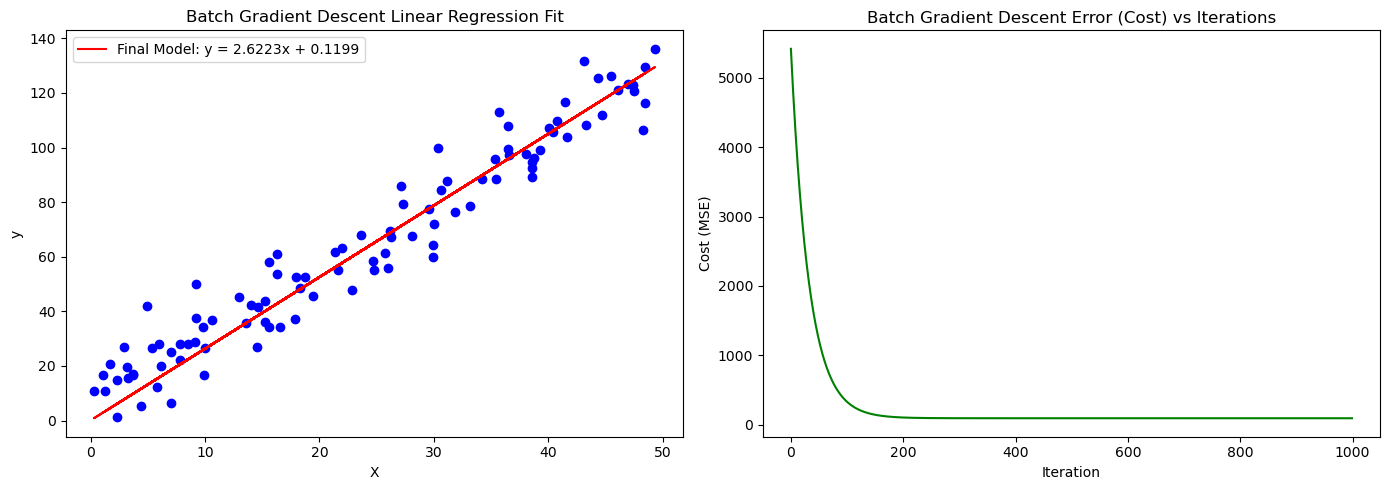

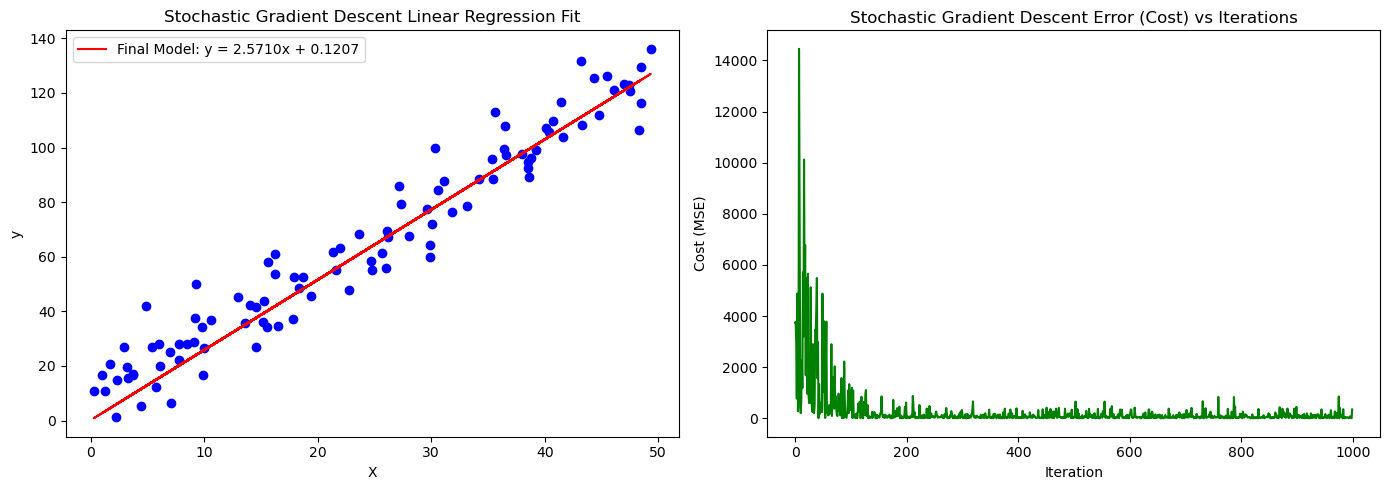

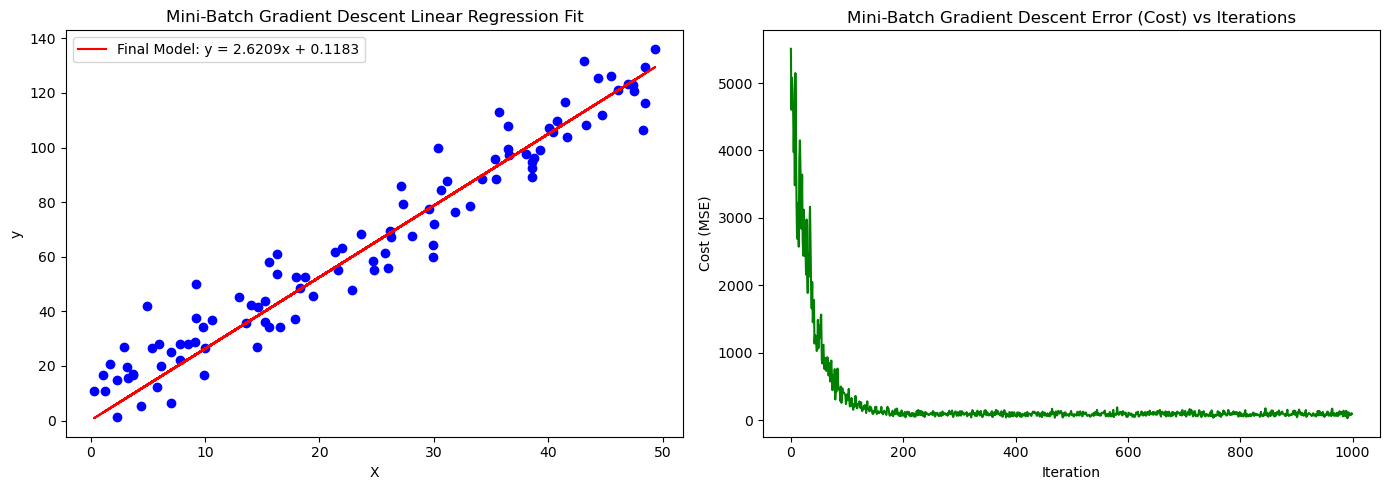

In [109]:
plot_gradient_descent(X, y, m_bgd, b_bgd, cost_history_bgd, 'Batch Gradient Descent')
plot_gradient_descent(X, y, m_sgd, b_sgd, cost_history_sgd, 'Stochastic Gradient Descent')
plot_gradient_descent(X, y, m_mgd, b_mgd, cost_history_mgd, 'Mini-Batch Gradient Descent')

# California housing price prediction

## 1. Load and Explore the Data

In [110]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load the California Housing dataset
california = fetch_california_housing()

# Convert to a pandas DataFrame
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target

# Display the first few rows of the dataset
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [111]:
df.shape

(20640, 9)

## 2. Data Preprocessing

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define the features (X) and the target (y)
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [119]:
X_train_scaled

array([[-0.326196  ,  0.34849025, -0.17491646, ...,  0.05137609,
        -1.3728112 ,  1.27258656],
       [-0.03584338,  1.61811813, -0.40283542, ..., -0.11736222,
        -0.87669601,  0.70916212],
       [ 0.14470145, -1.95271028,  0.08821601, ..., -0.03227969,
        -0.46014647, -0.44760309],
       ...,
       [-0.49697313,  0.58654547, -0.60675918, ...,  0.02030568,
        -0.75500738,  0.59946887],
       [ 0.96545045, -1.07984112,  0.40217517, ...,  0.00707608,
         0.90651045, -1.18553953],
       [-0.68544764,  1.85617335, -0.85144571, ..., -0.08535429,
         0.99543676, -1.41489815]])

In [113]:
X_train.shape

(16512, 8)

In [114]:
X_test.shape

(4128, 8)

In [116]:
y_train.shape

(16512,)

In [117]:
y_test.shape

(4128,)

## 3. Train the Linear Regression Model

In [122]:
from sklearn.linear_model import LinearRegression 

# Initialize the model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train_scaled, y_train)

# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")

Coefficients: [ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
 -0.89692888 -0.86984178]
Intercept: 2.0719469373788777


## 4. Make Predictions and Evaluate the Model

In [124]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)
# y_pred

# Calculate Mean Squared Error (MSE) and R-squared (R²)
mse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

Mean Squared Error: 0.5559
R-squared: 0.5758


In [132]:
X_train_scaled.ndim

2

In [142]:
# Example single input sample (assuming it's a 1D array with the same number of features as X_train)
single_sample = np.array([[8.3252, 41.0, 6.984127, 1.0238095, 322.0, 2.555556, 37.88, -122.23])
print('predict_value\n', single_sample)

# Reshape the sample to be 2D (as the model expects 2D input)
single_sample_reshaped = single_sample.reshape(1, -1)
print('single_sample_reshaped\n', single_sample_reshaped)

# Apply the same scaling that was used on the training data
# feature_names = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
# single_sample_reshaped = pd.DataFrame(single_sample_reshaped, columns=feature_names)
# print('single_sample_reshaped\n', single_sample_reshaped)

single_sample_scaled = scaler.transform(single_sample_reshaped)
print('single_sample_scaled\n', single_sample_scaled)

# Make the prediction
single_prediction = model.predict(single_sample_scaled)

print(f"Predicted value: {single_prediction[0]:.4f}")

predict_value
 [   8.3252      41.           6.984127     1.0238095  322.
    2.555556    37.88      -122.23     ]
single_sample_reshaped
 [[   8.3252      41.           6.984127     1.0238095  322.
     2.555556    37.88      -122.23     ]]
single_sample_scaled
 [[ 2.33397811  0.98330419  0.64880422 -0.16822486 -0.97135592 -0.04675996
   1.04692041 -1.32016306]]
Predicted value: 4.1519


C:\Users\zinmi\anaconda3\envs\data_analysis_test\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## 5. Visualize the Results

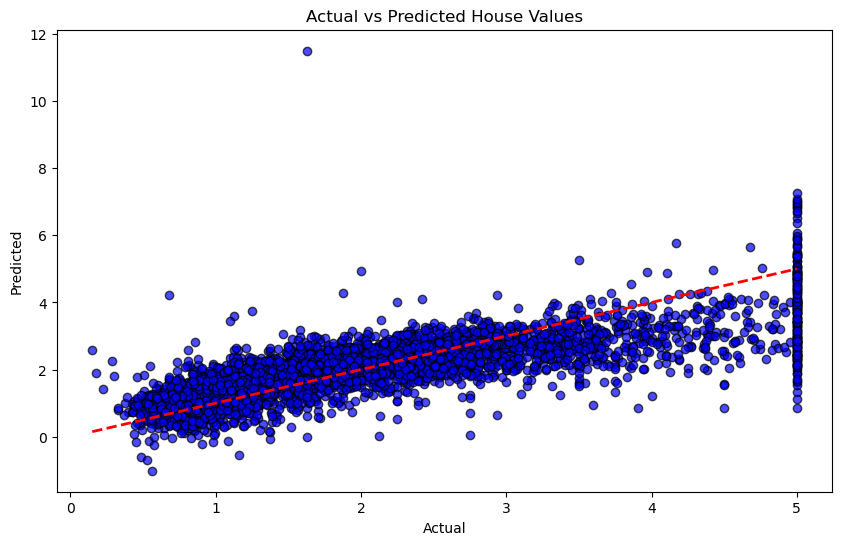

In [67]:
import matplotlib.pyplot as plt

# Plotting the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted House Values')
plt.show()


# Exercise - Label encoding and One-hot encoding

In [143]:
import pandas as pd

# Data preparation
data = {
    'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'SIZE': [500, 550, 620, 630, 665, 700, 770, 880, 920, 1000],
    'FLOOR': [4, 7, 9, 5, 8, 4, 10, 12, 14, 9],
    'BROADBAND_RATE': [8, 50, 7, 24, 100, 8, 7, 50, 8, 24],
    'ENERGY_RATING': ['A', 'B', 'C', 'B', 'C', 'B', 'B', 'A', 'C', 'A'],
    'RENTAL_PRICE': [320, 380, 400, 390, 385, 410, 480, 600, 570, 620]
}

df = pd.DataFrame(data)
df = df.drop(columns=['ID'])  # Drop the ID column as it's not needed
print(df)


   SIZE  FLOOR  BROADBAND_RATE ENERGY_RATING  RENTAL_PRICE
0   500      4               8             A           320
1   550      7              50             B           380
2   620      9               7             C           400
3   630      5              24             B           390
4   665      8             100             C           385
5   700      4               8             B           410
6   770     10               7             B           480
7   880     12              50             A           600
8   920     14               8             C           570
9  1000      9              24             A           620


In [144]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Features and target variable (without energy_rating)
X = df.drop(columns=['RENTAL_PRICE', 'ENERGY_RATING'])
y = df['RENTAL_PRICE']

In [147]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression model
model_no_energy = LinearRegression()
model_no_energy.fit(X_train_scaled, y_train)

LinearRegression()

In [148]:
# Predictions
y_pred_no_energy = model_no_energy.predict(X_test_scaled)

# Evaluation
mse_no_energy = mean_squared_error(y_test, y_pred_no_energy)
print(f"MSE (Without energy rating): {mse_no_energy:.2f}")

r2_no_energy = r2_score(y_test, y_pred_no_energy)
print(f"R-squared: {r2:.4f}")

MSE (Without energy rating): 1928.43
R-squared: 0.5758


In [ ]:
MSE, MAE, R squared

### Label Encoding

In [149]:
from sklearn.preprocessing import LabelEncoder

# Label encoding for ENERGY_RATING
label_encoder = LabelEncoder()
df['ENERGY_RATING_ENCODED'] = label_encoder.fit_transform(df['ENERGY_RATING'])

In [150]:
df

,SIZE,FLOOR,BROADBAND_RATE,ENERGY_RATING,RENTAL_PRICE,ENERGY_RATING_ENCODED
0,500,4,8,A,320,0
1,550,7,50,B,380,1
2,620,9,7,C,400,2
3,630,5,24,B,390,1
4,665,8,100,C,385,2
5,700,4,8,B,410,1
6,770,10,7,B,480,1
7,880,12,50,A,600,0
8,920,14,8,C,570,2
9,1000,9,24,A,620,0


In [155]:
# Features and target variable (with energy_rating) - preporcessing
X_with_energy = df.drop(columns=['RENTAL_PRICE', 'ENERGY_RATING'])
y = df['RENTAL_PRICE']

# Train-test split
X_train_energy, X_test_energy, y_train_energy, y_test_energy = train_test_split(X_with_energy, y, test_size=0.2, random_state=42)

# Scaling
X_train_energy_scaled = scaler.fit_transform(X_train_energy)
X_test_energy_scaled = scaler.transform(X_test_energy)

# Linear Regression model
model_with_energy = LinearRegression()
model_with_energy.fit(X_train_energy_scaled, y_train_energy)

# Predictions
y_pred_with_energy = model_with_energy.predict(X_test_energy_scaled)

# Evaluation
mse_with_energy = mean_squared_error(y_test_energy, y_pred_with_energy)
print(f"MSE (With energy rating): {mse_with_energy:.2f}")

r2_with_energy = r2_score(y_test_energy, y_pred_with_energy)
print(f"R-squared: {r2_with_energy:.4f}")

MSE (With energy rating): 547.41
R-squared: 0.9393


In [156]:
# Decode the encoded values back to the original categories
df['ENERGY_RATING_DECODED'] = label_encoder.inverse_transform(df['ENERGY_RATING_ENCODED'])

In [157]:
df

,SIZE,FLOOR,BROADBAND_RATE,ENERGY_RATING,RENTAL_PRICE,ENERGY_RATING_ENCODED,ENERGY_RATING_DECODED
0,500,4,8,A,320,0,A
1,550,7,50,B,380,1,B
2,620,9,7,C,400,2,C
3,630,5,24,B,390,1,B
4,665,8,100,C,385,2,C
5,700,4,8,B,410,1,B
6,770,10,7,B,480,1,B
7,880,12,50,A,600,0,A
8,920,14,8,C,570,2,C
9,1000,9,24,A,620,0,A


### One-Hot encoding 

In [182]:
import pandas as pd

# Original data
data = {
    'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'SIZE': [500, 550, 620, 630, 665, 700, 770, 880, 920, 1000],
    'FLOOR': [4, 7, 9, 5, 8, 4, 10, 12, 14, 9],
    'BROADBAND_RATE': [8, 50, 7, 24, 100, 8, 7, 50, 8, 24],
    'ENERGY_RATING': ['A', 'B', 'C', 'B', 'C', 'B', 'B', 'A', 'C', 'A'],
    'RENTAL_PRICE': [320, 380, 400, 390, 385, 410, 480, 600, 570, 620]
}

# Create DataFrame
df = pd.DataFrame(data)

# Drop the ID column
df = df.drop(columns=['ID'])

# Apply one-hot encoding to ENERGY_RATING
df_one_hot = pd.get_dummies(df, columns=['ENERGY_RATING'], prefix='ENERGY_RATING_', prefix_sep='')

# Ensure no Boolean conversion
df_one_hot = df_one_hot.astype(int)  # Convert any Boolean columns to integers

# Display the DataFrame with one-hot encoding
print(df_one_hot)


   SIZE  FLOOR  BROADBAND_RATE  RENTAL_PRICE  ENERGY_RATING_A  \
0   500      4               8           320                1   
1   550      7              50           380                0   
2   620      9               7           400                0   
3   630      5              24           390                0   
4   665      8             100           385                0   
5   700      4               8           410                0   
6   770     10               7           480                0   
7   880     12              50           600                1   
8   920     14               8           570                0   
9  1000      9              24           620                1   

   ENERGY_RATING_B  ENERGY_RATING_C  
0                0                0  
1                1                0  
2                0                1  
3                1                0  
4                0                1  
5                1                0  
6                1

In [178]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Original data
data = {
    'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'SIZE': [500, 550, 620, 630, 665, 700, 770, 880, 920, 1000],
    'FLOOR': [4, 7, 9, 5, 8, 4, 10, 12, 14, 9],
    'BROADBAND_RATE': [8, 50, 7, 24, 100, 8, 7, 50, 8, 24],
    'ENERGY_RATING': ['A', 'B', 'C', 'B', 'C', 'B', 'B', 'A', 'C', 'A'],
    'RENTAL_PRICE': [320, 380, 400, 390, 385, 410, 480, 600, 570, 620]
}

# Create DataFrame
df = pd.DataFrame(data)

# Drop the ID column
df = df.drop(columns=['ID'])

# Define features and target variable
X = df.drop(columns=['RENTAL_PRICE'])

# Initialize OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)  # Use sparse_output instead of sparse

# Apply OneHotEncoder to the ENERGY_RATING column
X_encoded = encoder.fit_transform(X[['ENERGY_RATING']])

# Create DataFrame from the encoded features
encoded_columns = encoder.get_feature_names_out(['ENERGY_RATING'])
df_encoded = pd.DataFrame(X_encoded, columns=encoded_columns)

# Drop the original ENERGY_RATING column from X and concatenate with encoded columns
X = X.drop(columns=['ENERGY_RATING'])
df_encoded = pd.concat([X.reset_index(drop=True), df_encoded], axis=1)

# Display the DataFrame with one-hot encoding
print(df_encoded)


   SIZE  FLOOR  BROADBAND_RATE  ENERGY_RATING_B  ENERGY_RATING_C
0   500      4               8              0.0              0.0
1   550      7              50              1.0              0.0
2   620      9               7              0.0              1.0
3   630      5              24              1.0              0.0
4   665      8             100              0.0              1.0
5   700      4               8              1.0              0.0
6   770     10               7              1.0              0.0
7   880     12              50              0.0              0.0
8   920     14               8              0.0              1.0
9  1000      9              24              0.0              0.0
